# Softmax Classifiers and MLP with levelwise dertivatives

**IMPORTANT**:
This Notebook is based on Assignment 1 given during the course "CS231n: 
Convolutional Neural Networks for Visual Recognition" at Stanford University.

In this TP you have to implement two classifiers; Softmax and MLP. The softmax is the same as you did in last TP, but here we ask you to give all intermediate derivatives. The MLP is simply an extended version of the softmax classifier with one more layyer.

You have the skeleton code and only need to write a few lines of code. What is important in this TP is not your code but your understanding of the problem. That's why we ask you to write and derive all the formulas on your report before implementing them. We will be vigilant regarding the correspondence of formulas and code.


Here is a summary of what you will have to do :
- *find* the formulas you need to implement, by doing the backward pass manually.
- *report* these formulas in your report
- *implement* the formulas you derive
- *test* if your code works

**LOOPS ARE NOT ALLOWED**. You must be able to write all the code you are asked for without loops. 

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# make figures appear inline
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Softmax classifier

We ask you to implement a softmax classifier.

Visualizing some samples


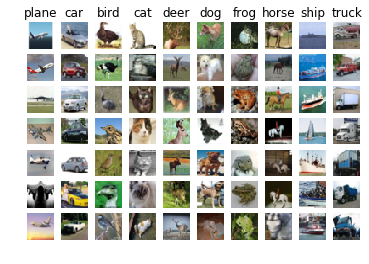

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3073)
Test labels shape:  (10000,)


In [2]:
# load all the classes
cifar10_dir = 'datasets/cifar-10-batches-py'
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
print("Visualizing some samples")
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# choising parameters for subsampling
num_training = 49000
num_validation = 1000

# subsample the data
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Normalize the data: subtract the mean image and divide by the std
mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# add bias dimension and transform into columns
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


num_dims = X_train.shape[1]

# Printing dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

First, you need to implement the forward pass! Be sure to put the formulas on the report first !

In [3]:
# First implement the forward method.
# Open the file softmax_classifier.py and implement the
# forward method.
from softmax_classifier import SoftmaxClassifier

sum_probs_test = [3686.68917834, 7316.67343288, 2545.80815387, 5886.5694029,  6709.66593813,
                  6151.76263585, 4745.42478883, 4683.19162857, 2478.14829358, 4796.06654704]

model = SoftmaxClassifier(num_dims, num_classes, random_seed=13)
probs = model.forward(X_train)
                                  
if probs is None:
    print("You have to implement scores first.")
else:
    if np.abs(probs.sum(0) - np.array(sum_probs_test)).sum() < 1e-7:
        print("Great! Your implementation of scores seems good !")
    else:
        print("Bad news! Your implementation of scores seems wrong !")

Great! Your implementation of scores seems good !


Then implement the loss method ! Be sure to put the formulas on the report first !

In [4]:
# Open the file softmax_classifier.py and implement the
# loss method.
from softmax_classifier import SoftmaxClassifier

model = SoftmaxClassifier(num_dims, num_classes, random_seed=13)
_ = model.forward(X_train)
loss = model.loss(X_train, y_train, 0.0)

if loss is None:
    print("You have to implement loss first.")
else:
    if np.abs(loss - 5.65453535) < 1e-7:
        print("Great! Your implementation of the loss seems good !")
    else:
        print("Bad news! Your implementation of  the loss seems wrong !")

Great! Your implementation of the loss seems good !


Finally, implement the computation of the gradients in backward method! Be sure to put the formulas on the report first !

In [5]:
# Open the file softmax_classifier.py and implement the
# backward method.
from softmax_classifier import SoftmaxClassifier

N = X_train.shape[0]

model = SoftmaxClassifier(num_dims, num_classes, random_seed=13)
# before backward we need to forward
Q = model.forward(X_train)
grads = model.backward(X_train, y_train, 0.0)



if grads is None:
    print("You have to implement the gradients first.")
else:
    # computing gradients with the batch version
    C = np.zeros((N, num_classes))
    C[range(N), y_train] = 1
    grads_analytic = (X_train).T.dot(Q - C)
    if grads_analytic.shape == grads.shape \
    and np.sum(grads_analytic) - np.sum(grads) < 1e-7 \
    and np.max(grads_analytic) - np.max(grads) < 1e-7 \
    and np.min(grads_analytic) - np.min(grads) < 1e-7:
        print("Great! Your implementation of gradients seems good !")
    else:
        print("Bad news! Your implementation of gradients seems wrong !")

Great! Your implementation of gradients seems good !


If you are getting into throubles during the implementation of the gradients, try to use the cell below to debug your gradiens. 

First think about the dimensions the gradients should have the same shape has the element they are for!

In [6]:
# This cell check all local derivatives to try to help you find a bug.
# If the previous code cell returns "great", this one should not give you any error.
from softmax_classifier import SoftmaxClassifier

def same_content(A, B):
    if np.array_equal(A, np.zeros(1)):
        return False
    A = [A.sum(), A.max(), A.min()]
    if (np.array(A) - np.array(B)).sum() < 1e-5:
        return True
    return False

dLoss_dProbs = [-3810211946183.7754, -0.0, -3147476732219.055]
dProbs_dScores = [5.2149257134814775e-14, 0.24999999999736983, -0.24990727447134475]
dLoss_dScores = [1.141309269314661e-13, 0.9999981661360309, -0.9999999999996821]
dScores_dW = [49000.00000002424, 155.031, -140.29748979591838]
dLoss_dW = [0.26850115388515405, 579293.6998373481, -463509.5137372456]
dScores_dX = [0.1342505763011005, 0.004442371066049412, -0.004706426140736417]
dLoss_dX = [112.28116582955269, 0.006450477708706644, -0.006450002972772494]



N = X_train.shape[0]
model = SoftmaxClassifier(num_dims, num_classes, random_seed=13)
# before backward we need to forward
_ = model.forward(X_train)
_ = model.backward(X_train, y_train, 1.0, dP_dS=True)

content = ""

# LEVEL 1
# dLoss / dProbs
content += "\ndLoss / dProbs :\n"
content += "\t Shape: OK!\n" if model.dLoss_dProbs.shape == (N, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dProbs, dLoss_dProbs) else "\t Content: NOT OK!\n"

# LEVEL 2
# dProbs / dScores
content += "\ndProbs / dScores:\n"
content += "\t Shape: OK!\n" if model.dProbs_dScores.shape == (N, num_classes, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dProbs_dScores, dProbs_dScores) else "\t Content: NOT OK!\n"

# dLoss / dScores
content += "\nLoss / dScores:\n"
content += "\t Shape: OK!\n" if model.dLoss_dScores.shape == (N, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dScores, dLoss_dScores) else "\t Content: NOT OK!\n"

# LEVEL 3
# dScores / dWeights
content += "\ndScores / dWeights:\n"
content += "\t Shape: OK!\n" if model.dScores_dW.shape == (N, num_dims) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dScores_dW, dScores_dW) else "\t Content: NOT OK!\n"

# dLoss / dWeights
content += "\ndLoss / dWeights:\n"
content += "\t Shape: OK!\n" if model.dLoss_dW.shape == (num_dims, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dW, dLoss_dW) else "\t Content: NOT OK!\n"

# dScores / dX
content += "\ndScores / dX:\n"
content += "\t Shape: OK!\n" if model.dScores_dX.shape == (num_dims, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dScores_dX, dScores_dX) else "\t Content: NOT OK!\n"

# dLoss / dX
content += "\ndLoss / dX:\n"
content += "\t Shape: OK!\n" if model.dLoss_dX.shape == (N, num_dims) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dX, dLoss_dX) else "\t Content: NOT OK!\n"

print(content)


dLoss / dProbs :
	 Shape: OK!
	 Content: OK!

dProbs / dScores:
	 Shape: OK!
	 Content: OK!

Loss / dScores:
	 Shape: OK!
	 Content: OK!

dScores / dWeights:
	 Shape: OK!
	 Content: OK!

dLoss / dWeights:
	 Shape: OK!
	 Content: OK!

dScores / dX:
	 Shape: OK!
	 Content: OK!

dLoss / dX:
	 Shape: OK!
	 Content: OK!



Before start playing, we need to implement the prediction method of the classifier. Implement it here:

In [7]:
# Open the file softmax_classifier.py and implement the
# predict method.
from softmax_classifier import SoftmaxClassifier

model = SoftmaxClassifier(num_dims, num_classes, random_seed=13)
y_pred = model.predict(X_train)

if not np.sum(y_pred):
    print("You have to implement the gradients first.")
else:
    if np.abs(np.sum(y_pred) - 210313.) < 1e-7:
        print("Great! Your implementation of gradients seems good !")
    else:
        print("Bad news! Your implementation of gradients seems wrong !")

Great! Your implementation of gradients seems good !


We can now use validation to tune the hyperparameters. To reduce the computational time at this step we will reduce the dataset. Performing the computation of all the derivatives takes some time.

Don't forget to vectorize your formulas, loops are very expensive !

In [8]:
def get_samples_idxs(samples_per_class, y_data):
    idx_keep = []
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_data == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        idx_keep += idxs.tolist()
        np.random.shuffle(idx_keep) 
    return idx_keep

np.random.seed(13)

samples_per_class_train = 500
samples_per_class_val = 50
samples_per_class_test = 100

idx_keep_train = get_samples_idxs(samples_per_class_train, y_train)
idx_keep_val = get_samples_idxs(samples_per_class_val, y_val)
idx_keep_test = get_samples_idxs(samples_per_class_test, y_test)


# subsample the data
X_train = X_train[idx_keep_train]
y_train = y_train[idx_keep_train]

X_val = X_val[idx_keep_val]
y_val = y_val[idx_keep_val]

X_test = X_test[idx_keep_test]
y_test = y_test[idx_keep_test]


# Printing dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (5000, 3073)
Train labels shape:  (5000,)
Validation data shape:  (500, 3073)
Validation labels shape:  (500,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)


lr = 1e-07, reg = 100.0
	 -> train acc = 0.398, val acc = 0.312                                                                                                               
lr = 1e-07, reg = 10000.0
	 -> train acc = 0.392, val acc = 0.354                                                                                                               
lr = 1e-07, reg = 10.0
	 -> train acc = 0.397, val acc = 0.314                                                                                                               
lr = 1e-07, reg = 1
	 -> train acc = 0.397, val acc = 0.314                                                                                                               
lr = 1e-08, reg = 100.0
	 -> train acc = 0.247, val acc = 0.280                                                                                                               
lr = 1e-08, reg = 10000.0
	 -> train acc = 0.267, val acc = 0.294                                                               

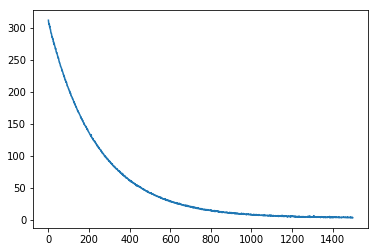

In [9]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from softmax_classifier import SoftmaxClassifier
import copy
# to save loss of best model
best_hist = {}
# to save accuracy on validation set of best model
best_val = -1
# to save best model
best_logistic = None
best_lr = 0.0
best_reg = 0.0

learning_rates = [1e-7, 1e-8]
regularization_strengths = [1e2, 1e4, 1e1, 1]
# number of iterations to train
num_iters = 1500
# if true display informations about training
verbose = True

for lr in learning_rates:
    for reg in regularization_strengths:
        print("lr = {}, reg = {}".format(lr, reg))
        model = SoftmaxClassifier(num_dims, num_classes, random_seed=13)
        ################################################################################
        # TODO:                                                                        #
        # Write code that chooses the best hyperparameters by tuning on the validation #
        # set. For each combination of hyperparameters, train a model on the           #
        # training set, compute its accuracy on the training and validation sets, and  #
        # store the best validation accuracy in best_val and the model object that     #
        # achieves this accuracy in best_logistc.                                      #
        #                                                                              #
        # Hint: You should use a small value for num_iters as you develop your         #
        # validation code so that the model don't take much time to train; once you are#
        # confident that your validation code works, you should rerun the validation   #
        # code with a larger value for num_iters, lets say 1500.                       #
        #                                                                              #
        # To copy the model use best_model = copy.deepcopy(model)                      #
        ################################################################################
        loss = model.train(X_train, y_train, num_iters, lr, reg, verbose=True)
        
        y_pred_train = model.predict(X_train)
        acc_train = np.mean(y_train == y_pred_train)
        
        y_pred_validation = model.predict(X_val)
        acc_val = np.mean(y_pred_validation == y_val)
        
        if (acc_val > best_val):
            best_val = acc_val
            best_lr = lr
            best_reg = reg
            best_hist = loss
            best_logistic = copy.deepcopy(model)
        ################################################################################
        #                              END OF YOUR CODE                                #
        ################################################################################
        print("\r\t -> train acc = {:.3f}, val acc = {:.3f}".format(acc_train, acc_val))

print('best validation accuracy achieved during cross-validation: {:.3f}'.format(best_val))
plt.plot(best_hist["train_loss"], label="train loss")

plt.show()

Now that we have the best model, we can test the accuracy on test set.

In [10]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_logistic.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Logistic on raw pixels final test set accuracy: {:.3f}'.format(test_accuracy))

Logistic on raw pixels final test set accuracy: 0.329


And finally visualizy the weights.

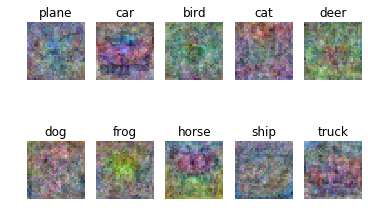

In [11]:
# Visualize the learned weights for each class
w = best_logistic.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

# MLP

We ask you now to extend your softmax classifier with one more layer. The resulting network will be a multilayer perceptron (MLP).

Most of the code you did in the softmax classifier can be reused. The only methods where you need to add some lines of code are forward and backward.

In forward you need to take into account the new layer duing the computation of the probabilities.
In backward you need to compute the new gradients with respect to the new set of weights.


In [12]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# make figures appear inline
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Visualizing some samples


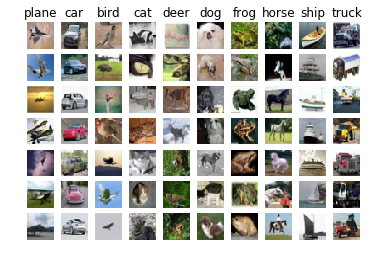

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3073)
Test labels shape:  (10000,)


In [13]:
# load all the classes
cifar10_dir = 'datasets/cifar-10-batches-py'
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
print("Visualizing some samples")
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# choising parameters for subsampling
num_training = 49000
num_validation = 1000

# subsample the data
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Normalize the data: subtract the mean image and divide by the std
mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

# add bias dimension and transform into columns
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


num_dims = X_train.shape[1]

# Printing dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

First, you need to implement the forward pass! Be sure to put the formulas on the report first !

In [14]:
# First implement the forward method.
# Open the file softmax_classifier.py and implement the
# forward method.
from mlp import MLP

sum_probs_test = [4898.757432689954, 4902.225015570076, 4899.382555984644, 4900.70491757786, 
                  4898.454662888324, 4899.021295482354, 4898.850139082313, 4901.748730855941,
                  4900.350478627343, 4900.504771241191]

model = MLP(num_dims, 128, num_classes, random_seed=13)
probs = model.forward(X_train)

if probs is None:
    print("You have to implement scores first.")
else:
    if np.abs(probs.sum(0) - np.array(sum_probs_test)).sum() < 1e-7:
        print("Great! Your implementation of scores seems good !")
    else:
        print("Bad news! Your implementation of scores seems wrong !")

Great! Your implementation of scores seems good !


Then implement the loss method ! Be sure to put the formulas on the report first !

In [15]:
# Open the file softmax_classifier.py and implement the
# loss method.
from mlp import MLP

model = MLP(num_dims, 128, num_classes, random_seed=13)
_ = model.forward(X_train)
loss = model.loss(X_train, y_train, 0.0)

if loss is None:
    print("You have to implement loss first.")
else:
    if np.abs(loss - 2.303255307) < 1e-7:
        print("Great! Your implementation of the loss seems good !")
    else:
        print("Bad news! Your implementation of  the loss seems wrong !")

Great! Your implementation of the loss seems good !


Finally, implement the computation of the gradients in backward method! Be sure to put the formulas on the report first !

In [16]:
# Open the file softmax_classifier.py and implement the
# backward method.
from mlp import MLP


N = X_train.shape[0]

model = MLP(num_dims, 128, num_classes, random_seed=13)
# before backward we need to forward
Q = model.forward(X_train)
grads = model.backward(X_train, y_train, 0.0)



if grads["W1"] is None or grads["W2"] is None:
    print("You have to implement the gradients first.")
else:
    # computing gradients with the batch version
    C = np.zeros((N, num_classes))
    C[range(N), y_train] = 1

    grads_analytic_W1 = X_train.T.dot((Q - C).dot(model.W2.T))
    grads_analytic_W2 = (X_train.dot(model.W1)).T.dot(Q - C)
    if np.isclose(grads_analytic_W1, grads["W1"]).all()\
    and np.isclose(grads_analytic_W2, grads["W2"]).all():
        print("Great! Your implementation of gradients seems good !")
    else:
        print("Bad news! Your implementation of gradients seems wrong !")

Great! Your implementation of gradients seems good !


If you are getting into throubles during the implementation of the gradients, try to use the cell below to debug your gradiens. 

First think about the dimensions the gradients should have the same shape has the element they are for!

In [17]:
# This cell check all local derivatives to try to help you find a bug.
# If the previous code cell returns "great", this one should not give you any error.
from mlp import MLP

def same_content(A, B):
    if np.array_equal(A, np.zeros(1)):
        return False
    A = [A.sum(), A.max(), A.min()]
    if (np.array(A) - np.array(B)).sum() < 1e-5:
        return True
    return False

dLoss_dProbs = [-490656.7017266333, -0.0, -12.012981542323267]
dProbs_dScores = [1.0283440765590512e-14,0.10610655035714026, -0.013556167401344707]
dLoss_dScores = [1.7486012637846216e-14, 0.12066709918218307, -0.9167567188481167]
dScores_dW2 = [-141.41495734416333, 22.357396893080075, -25.91429233948654]
dLoss_dW2 = [0.01522059488343075, 15804.418859398394, -19162.711858338203]
dScores_dHidden = [0.007610297393284419, 0.0029887207179070427, -0.0033672909837626965]
dLoss_dHidden = [0.27043683338251784, 0.0032325229740335776, -0.0028077294850832007]
dHidden_dW1 = [49000.00000002424, 155.031, -140.29748979591838]
dLoss_dW1 = [3321671.243764238, 1362.732437946318, -1675.285768006116]
dHidden_dX = [-0.4542162563738851, 0.004633008549146779, -0.004709407748146688]
dLoss_dX = [-0.0014711047361969005, 4.3748240697223114e-05, -4.510151419439094e-05]



N = X_train.shape[0]
num_hidden = 128
model = MLP(num_dims, num_hidden, num_classes, random_seed=13)
# before backward we need to forward
_ = model.forward(X_train)
_ = model.backward(X_train, y_train, 1.0, dP_dS=True)

content = ""


# LEVEL 1
# dLoss / dProbs
content += "\ndLoss / dProbs :\n"
content += "\t Shape: OK!\n" if model.dLoss_dProbs.shape == (N, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dProbs, dLoss_dProbs) else "\t Content: NOT OK!\n"

# LEVEL 2
# dProbs / dScores
content += "\ndProbs / dScores:\n"
content += "\t Shape: OK!\n" if model.dProbs_dScores.shape == (N, num_classes, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dProbs_dScores, dProbs_dScores) else "\t Content: NOT OK!\n"

# dLoss / dScores
content += "\nLoss / dScores:\n"
content += "\t Shape: OK!\n" if model.dLoss_dScores.shape == (N, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dScores, dLoss_dScores) else "\t Content: NOT OK!\n"

# LEVEL 3
# dScores / dW2
content += "\ndScores / dW2:\n"
content += "\t Shape: OK!\n" if model.dScores_dW2.shape == (N, num_hidden) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dScores_dW2, dScores_dW2) else "\t Content: NOT OK!\n"

# dLoss / dW2
content += "\ndLoss / dW2:\n"
content += "\t Shape: OK!\n" if model.dLoss_dW2.shape == (num_hidden, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dW2, dLoss_dW2) else "\t Content: NOT OK!\n"

# dScores / dHidden
content += "\ndScores / dHidden:\n"
content += "\t Shape: OK!\n" if model.dScores_dHidden.shape == (num_hidden, num_classes) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dScores_dHidden, dScores_dHidden) else "\t Content: NOT OK!\n"

# dLoss / dHidden
content += "\ndLoss / dHidden:\n"
content += "\t Shape: OK!\n" if model.dLoss_dHidden.shape == (N, num_hidden) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dHidden, dLoss_dHidden) else "\t Content: NOT OK!\n"

# LEVEL 4
# dHidden / dW1
content += "\ndHidden / dW1:\n"
content += "\t Shape: OK!\n" if model.dHidden_dW1.shape == (N, num_dims) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dHidden_dW1, dHidden_dW1) else "\t Content: NOT OK!\n"

# dLoss / dW1
content += "\ndLoss / dW1:\n"
content += "\t Shape: OK!\n" if model.dLoss_dW1.shape == (num_dims, num_hidden) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dW1, dLoss_dW1) else "\t Content: NOT OK!\n"

# dHidden / dX
content += "\ndScores / dX:\n"
content += "\t Shape: OK!\n" if model.dHidden_dX.shape == (num_dims, num_hidden) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dHidden_dX, dHidden_dX) else "\t Content: NOT OK!\n"

# dLoss / dX
content += "\ndLoss / dX:\n"
content += "\t Shape: OK!\n" if model.dLoss_dX.shape == (N, num_dims) else "\t Shape: NOT OK!\n"
content += "\t Content: OK!\n"if same_content(model.dLoss_dX, dLoss_dHidden) else "\t Content: NOT OK!\n"

print(content)


dLoss / dProbs :
	 Shape: OK!
	 Content: OK!

dProbs / dScores:
	 Shape: OK!
	 Content: OK!

Loss / dScores:
	 Shape: OK!
	 Content: OK!

dScores / dW2:
	 Shape: OK!
	 Content: OK!

dLoss / dW2:
	 Shape: OK!
	 Content: OK!

dScores / dHidden:
	 Shape: OK!
	 Content: OK!

dLoss / dHidden:
	 Shape: OK!
	 Content: OK!

dHidden / dW1:
	 Shape: OK!
	 Content: OK!

dLoss / dW1:
	 Shape: OK!
	 Content: NOT OK!

dScores / dX:
	 Shape: OK!
	 Content: OK!

dLoss / dX:
	 Shape: OK!
	 Content: OK!



Before start playing, we need to implement the prediction method of the classifier. Implement it here:

In [18]:
# Open the file softmax_classifier.py and implement the
# predict method.
from mlp import MLP

model = MLP(num_dims, 128, num_classes, random_seed=13)
y_pred = model.predict(X_train)

if not np.sum(y_pred):
    print("You have to implement the gradients first.")
else:
    if np.abs(np.sum(y_pred) - 227889.) < 1e-7:
        print("Great! Your implementation of gradients seems good !")
    else:
        print("Bad news! Your implementation of gradients seems wrong !")

Great! Your implementation of gradients seems good !


We can now use validation to tune the hyperparameters. To reduce the computational time at this step we will reduce the dataset. Performing the computation of all the derivatives takes some time.

Don't forget to vectorize your formulas, loops are very expensive !

In [19]:
def get_samples_idxs(samples_per_class, y_data):
    idx_keep = []
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_data == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        idx_keep += idxs.tolist()
        np.random.shuffle(idx_keep) 
    return idx_keep

np.random.seed(13)

samples_per_class_train = 200
samples_per_class_val = 25
samples_per_class_test = 50

idx_keep_train = get_samples_idxs(samples_per_class_train, y_train)
idx_keep_val = get_samples_idxs(samples_per_class_val, y_val)
idx_keep_test = get_samples_idxs(samples_per_class_test, y_test)


# subsample the data
X_train = X_train[idx_keep_train]
y_train = y_train[idx_keep_train]

X_val = X_val[idx_keep_val]
y_val = y_val[idx_keep_val]

X_test = X_test[idx_keep_test]
y_test = y_test[idx_keep_test]


# Printing dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (2000, 3073)
Train labels shape:  (2000,)
Validation data shape:  (250, 3073)
Validation labels shape:  (250,)
Test data shape:  (500, 3073)
Test labels shape:  (500,)


lr = 1e-05, reg = 1.0
	 -> train acc = 0.475, val acc = 0.308                                                                                                               
best validation accuracy achieved during cross-validation: 0.308


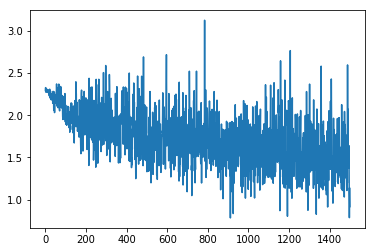

In [29]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from mlp import MLP
import copy

# to save loss of best model
best_hist = {}
# to save accuracy on validation set of best model
best_val = -1
# to save best model
best_logistic = None
best_lr = 0.0
best_reg = 0.0

#learning_rates = [1e-5, 1e-6, 1e-7, 1e-8]
#regularization_strengths = [1e0, 1e1, 1e2, 1e4]
learning_rates = [1e-5]
regularization_strengths = [1e0]

# number of iterations to train
num_iters = 1500
# if true display informations about training
verbose = True

for lr in learning_rates:
    for reg in regularization_strengths:
        print("lr = {}, reg = {}".format(lr, reg))
        model = MLP(num_dims, 128, num_classes, random_seed=13)
        ################################################################################
        # TODO:                                                                        #
        # Write code that chooses the best hyperparameters by tuning on the validation #
        # set. For each combination of hyperparameters, train a model on the           #
        # training set, compute its accuracy on the training and validation sets, and  #
        # store the best validation accuracy in best_val and the model object that     #
        # achieves this accuracy in best_logistc.                                      #
        #                                                                              #
        # Hint: You should use a small value for num_iters as you develop your         #
        # validation code so that the model don't take much time to train; once you are#
        # confident that your validation code works, you should rerun the validation   #
        # code with a larger value for num_iters, lets say 2000.                       #
        #                                                                              #
        # To copy the model use best_model = copy.deepcopy(model)                      #
        ################################################################################
        loss = model.train(X_train, y_train, num_iters, lr, reg, verbose=True)
        
        y_pred_train = model.predict(X_train)
        acc_train = np.mean(y_train == y_pred_train)
        
        y_pred_validation = model.predict(X_val)
        acc_val = np.mean(y_pred_validation == y_val)
        
        if (acc_val > best_val):
            best_val = acc_val
            best_lr = lr
            best_reg = reg
            best_hist = loss
            best_logistic = copy.deepcopy(model)
        ################################################################################
        #                              END OF YOUR CODE                                #
        ################################################################################
        print("\r\t -> train acc = {:.3f}, val acc = {:.3f}".format(acc_train, acc_val))


print('best validation accuracy achieved during cross-validation: {:.3f}'.format(best_val))
plt.plot(best_hist["train_loss"], label="train loss")

plt.show()

Now that we have the best model, we can test the accuracy on test set.

In [21]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_logistic.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Logistic on raw pixels final test set accuracy: {:.3f}'.format(test_accuracy))

Logistic on raw pixels final test set accuracy: 0.332


And finally visualizy the weights.

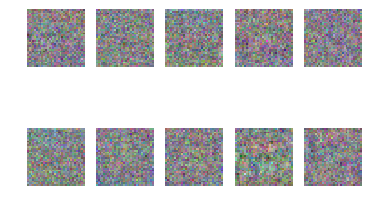

In [22]:
# Visualize the learned weights for each class
w = best_logistic.W1[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 128)

w_min, w_max = np.min(w), np.max(w)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
